In [1]:
# แบบฝึกหัด LSTM Stock Prediction
# ตัวอย่างโค้ดจาก
# https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df = df.set_index('id')

In [3]:
df.tail(5)

price
id         
3196  73.25
3197  72.25
3198  72.00
3199  63.25
3200  62.25

In [4]:
#df = df[1000:] # ทดลองตัวช่วงที่นิ่งๆ ออกไป ตามที่เพื่อนแนะนำ
df

price
id          
1      0.455
2      0.465
3      0.450
4      0.445
5      0.440
...      ...
3196  73.250
3197  72.250
3198  72.000
3199  63.250
3200  62.250

[3200 rows x 1 columns]

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

scaled_data

array([[7.53782372e-04],
       [8.61465568e-04],
       [6.99940774e-04],
       ...,
       [7.71173208e-01],
       [6.76950412e-01],
       [6.66182092e-01]])

In [6]:
# ใช้เวลา 200 วันทำนายวันถัดไป
# แบ่งข้อมูล 80/20

N_DAY = 60

In [7]:
training_data_len = int(np.ceil( len(df) * .80 ))

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(N_DAY, len(train_data)):
    x_train.append(train_data[i-N_DAY:i, 0])
    y_train.append(train_data[i, 0])

        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [8]:
x_train.shape

(2500, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10)

2023-05-21 23:27:49.736566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 23:27:55.081777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
40/40 [==============================] - 6s 65ms/step - loss: 0.0067
Epoch 2/10
40/40 [==============================] - 3s 68ms/step - loss: 0.0015
Epoch 3/10
40/40 [==============================] - 3s 75ms/step - loss: 0.0013
Epoch 4/10
40/40 [==============================] - 3s 71ms/step - loss: 0.0012
Epoch 5/10
40/40 [==============================] - 3s 66ms/step - loss: 0.0012
Epoch 6/10
40/40 [==============================] - 3s 66ms/step - loss: 0.0011
Epoch 7/10
40/40 [==============================] - 3s 66ms/step - loss: 0.0011
Epoch 8/10
40/40 [==============================] - 3s 72ms/step - loss: 9.2869e-04
Epoch 9/10
40/40 [==============================] - 3s 71ms/step - loss: 0.0011
Epoch 10/10
40/40 [==============================] - 3s 69ms/step - loss: 9.3276e-04


In [36]:
model.fit(x_train, y_train, batch_size=64, epochs=30)

Epoch 1/30
40/40 [==============================] - 3s 65ms/step - loss: 6.7800e-04
Epoch 2/30
40/40 [==============================] - 2s 61ms/step - loss: 6.2704e-04
Epoch 3/30
40/40 [==============================] - 2s 60ms/step - loss: 5.2480e-04
Epoch 4/30
40/40 [==============================] - 3s 67ms/step - loss: 4.9526e-04
Epoch 5/30
40/40 [==============================] - 3s 70ms/step - loss: 5.3984e-04
Epoch 6/30
40/40 [==============================] - 3s 67ms/step - loss: 5.0968e-04
Epoch 7/30
40/40 [==============================] - 3s 65ms/step - loss: 5.1725e-04
Epoch 8/30
40/40 [==============================] - 3s 66ms/step - loss: 5.1037e-04
Epoch 9/30
40/40 [==============================] - 3s 65ms/step - loss: 6.1529e-04
Epoch 10/30
40/40 [==============================] - 3s 68ms/step - loss: 5.6998e-04
Epoch 11/30
40/40 [==============================] - 3s 69ms/step - loss: 5.4682e-04
Epoch 12/30
40/40 [==============================] - 3s 68ms/step - loss: 

In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - N_DAY: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = df[['price']].iloc[training_data_len:, :]
for i in range(N_DAY, len(test_data)):
    x_test.append(test_data[i-N_DAY:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

20/20 [==============================] - 0s 19ms/step


/Users/nattapatattiratanasunthron/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


price    1.838596
dtype: float64

In [38]:
x_test.shape,y_test.shape

((640, 60, 1), (640, 1))

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions,y_test)

3.3804342481141454

/var/folders/w2/d201xf4j1r5c5k0m_bqxgqqh0000gn/T/ipykernel_2795/284783056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


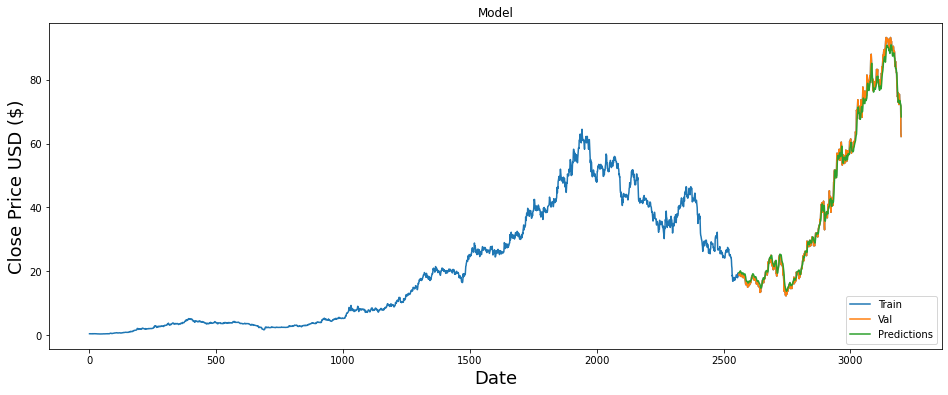

In [40]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df['price'])
plt.plot(valid[['price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
valid

price  Predictions
id                      
2561  18.70    19.571835
2562  19.30    19.517662
2563  19.00    19.644417
2564  19.70    19.726025
2565  19.60    19.959135
...     ...          ...
3196  73.25    73.043182
3197  72.25    72.694641
3198  72.00    72.126686
3199  63.25    71.586411
3200  62.25    68.375786

[640 rows x 2 columns]

In [42]:
look_back = N_DAY

In [43]:
test_data = scaled_data[-look_back:]  # Assuming the last N_DAY days are the test data
test_X = np.array(test_data).reshape(1, -1, 1)

predicted_prices = []
for _ in range(300): #300 next day
    prediction = model.predict(test_X)
    predicted_prices.append(prediction[0, 0])
    print(prediction)
    k = np.append(test_X[0][1:N_DAY],prediction)
    test_X = k.reshape(1,N_DAY,1)

1/1 [==============================] - 0s 30ms/step
[[0.69637525]]
1/1 [==============================] - 0s 30ms/step
[[0.6810554]]
1/1 [==============================] - 0s 29ms/step
[[0.67286026]]
1/1 [==============================] - 0s 29ms/step
[[0.66793436]]
1/1 [==============================] - 0s 29ms/step
[[0.66471344]]
1/1 [==============================] - 0s 29ms/step
[[0.6624673]]
1/1 [==============================] - 0s 28ms/step
[[0.66078824]]
1/1 [==============================] - 0s 28ms/step
[[0.6594134]]
1/1 [==============================] - 0s 29ms/step
[[0.6581617]]
1/1 [==============================] - 0s 29ms/step
[[0.65690917]]
1/1 [==============================] - 0s 37ms/step
[[0.65557563]]
1/1 [==============================] - 0s 46ms/step
[[0.65411514]]
1/1 [==============================] - 0s 39ms/step
[[0.6525086]]
1/1 [==============================] - 0s 30ms/step
[[0.65075606]]
1/1 [==============================] - 0s 30ms/step
[[0.64887094]]


1/1 [==============================] - 0s 24ms/step
[[0.5351788]]
1/1 [==============================] - 0s 24ms/step
[[0.5348058]]
1/1 [==============================] - 0s 27ms/step
[[0.5344385]]
1/1 [==============================] - 0s 26ms/step
[[0.5340768]]
1/1 [==============================] - 0s 26ms/step
[[0.53372073]]
1/1 [==============================] - 0s 26ms/step
[[0.53337026]]
1/1 [==============================] - 0s 25ms/step
[[0.53302497]]
1/1 [==============================] - 0s 25ms/step
[[0.53268504]]
1/1 [==============================] - 0s 25ms/step
[[0.5323504]]
1/1 [==============================] - 0s 26ms/step
[[0.5320208]]
1/1 [==============================] - 0s 26ms/step
[[0.5316963]]
1/1 [==============================] - 0s 25ms/step
[[0.5313768]]
1/1 [==============================] - 0s 26ms/step
[[0.5310621]]
1/1 [==============================] - 0s 25ms/step
[[0.53075236]]
1/1 [==============================] - 0s 24ms/step
[[0.53044724]]
1/1 

1/1 [==============================] - 0s 23ms/step
[[0.51433337]]
1/1 [==============================] - 0s 23ms/step
[[0.51427543]]
1/1 [==============================] - 0s 22ms/step
[[0.51421845]]
1/1 [==============================] - 0s 23ms/step
[[0.5141622]]
1/1 [==============================] - 0s 22ms/step
[[0.51410687]]
1/1 [==============================] - 0s 22ms/step
[[0.5140523]]
1/1 [==============================] - 0s 24ms/step
[[0.51399857]]
1/1 [==============================] - 0s 24ms/step
[[0.51394564]]
1/1 [==============================] - 0s 25ms/step
[[0.5138935]]
1/1 [==============================] - 0s 23ms/step
[[0.5138421]]
1/1 [==============================] - 0s 23ms/step
[[0.51379144]]
1/1 [==============================] - 0s 24ms/step
[[0.51374155]]
1/1 [==============================] - 0s 24ms/step
[[0.51369244]]
1/1 [==============================] - 0s 23ms/step
[[0.51364404]]
1/1 [==============================] - 0s 24ms/step
[[0.51359636]]

In [44]:
# Inverse transform the predicted prices to their original range
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1,1))

predicted_prices

array([[65.05389 ],
       [63.63121 ],
       [62.870167],
       [62.412724],
       [62.113613],
       [61.905025],
       [61.7491  ],
       [61.621426],
       [61.505184],
       [61.38887 ],
       [61.26503 ],
       [61.129402],
       [60.980213],
       [60.817463],
       [60.6424  ],
       [60.457016],
       [60.263657],
       [60.064754],
       [59.86262 ],
       [59.659317],
       [59.456566],
       [59.25575 ],
       [59.05791 ],
       [58.863758],
       [58.67379 ],
       [58.48823 ],
       [58.30714 ],
       [58.130466],
       [57.95806 ],
       [57.789726],
       [57.625233],
       [57.464363],
       [57.306866],
       [57.152542],
       [57.001232],
       [56.852734],
       [56.70695 ],
       [56.563732],
       [56.42301 ],
       [56.284702],
       [56.14874 ],
       [56.01507 ],
       [55.883656],
       [55.754456],
       [55.627434],
       [55.50255 ],
       [55.37978 ],
       [55.25908 ],
       [55.14043 ],
       [55.02379 ],


In [45]:
len(predicted_prices)

300

<AxesSubplot:>

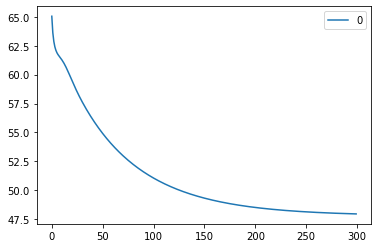

In [46]:
pd.DataFrame(predicted_prices).plot()

In [47]:
k = pd.DataFrame(predicted_prices)
k.columns = ['price']
k['id'] = np.arange(3201,3501)

In [48]:
k = k[['id','price']]
k = k.set_index('id')
k.to_csv('report.csv')